# Trained Model Check

In [32]:
import torch
import os
from meseg.model.factory import get_model
import os
import glob 
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.ndimage.interpolation import zoom
# from meseg.utils.etc import overlay

In [13]:
data_dir = "./data/segmentation/Synapse/test_vol_h5/"
case_list = os.listdir(data_dir)
npzfile = h5py.File(os.path.join(data_dir, case_list[0]))
print(npzfile['image'])
print(npzfile['label'])

<HDF5 dataset "image": shape (198, 512, 512), type "<f4">
(198, 512, 512)
<HDF5 dataset "label": shape (198, 512, 512), type "|u1">


150
(512, 512)


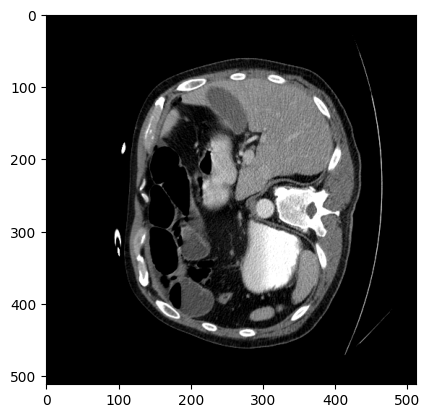

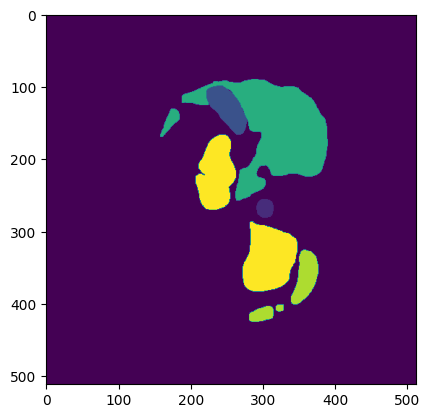

In [34]:
for i in range(150, npzfile['image'].shape[0]):
    if (npzfile['label'][i]>0).sum() > 0:
        break
    # plt.imshow(npzfile['image'][i])
    # plt.show()
print(i)
print(npzfile['image'][i].shape)
plt.imshow(npzfile['image'][i], cmap='gray')
plt.show()
plt.imshow(npzfile['label'][i])
plt.show()

In [52]:
slice = npzfile['image'][150]
slice = zoom(slice, (224/512, 224/512), order=3)
print(slice.shape)
# plt.imshow(slice, cmap='gray')
# plt.show()

(224, 224)


torch.Size([1, 1, 224, 224])
#params: 22,532,953
outputs shape:  torch.Size([1, 9, 224, 224])
torch.Size([224, 224])


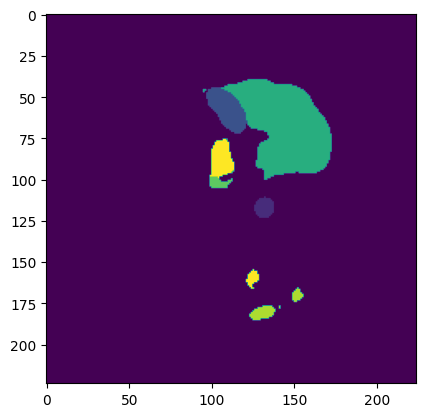

In [50]:
class args:
    ## type of model
    model_type = "transunet"
    mode = "valid"
    num_classes = 9
    device = "cuda:4"

    ## name of model
    model_name = "inception_transunet_d192_p2_f2_d2_add_ptres"
    path = "btcv_v2_inception_transunet_d192_p2_f2_d2_add_ptres_v0"

inputs = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().to(args.device)
print(inputs.shape)
model = get_model(args)
model.load_state_dict(torch.load(os.path.join("./log",args.path,"best_weight.pth")))
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.parameters()])))
outputs = model(inputs)
print("outputs shape: ",outputs.shape)

out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
print(out.shape)
plt.imshow(out.detach().cpu())
# for out in outputs:
#     plt.imshow(out.detach().cpu())
#     plt.show()

torch.Size([1, 1, 224, 224])
#params: 22,195,417
outputs shape:  torch.Size([1, 9, 224, 224])
torch.Size([224, 224])


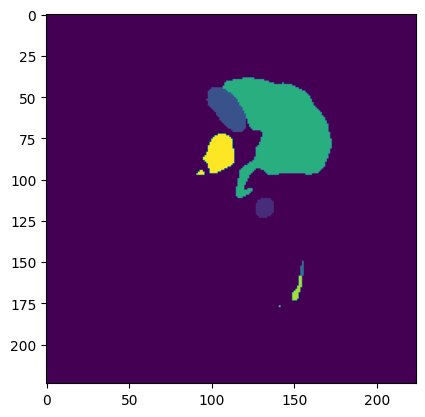

In [51]:
class args:
    ## type of model
    model_type = "transunet"
    mode = "valid"
    num_classes = 9
    device = "cuda:4"

    ## name of model
    model_name = "inception_transunet_d192_p1_f2_d0_add_ptres"
    path = "btcv_v2_inception_transunet_d192_p1_f2_d0_add_ptres_v0"

inputs = torch.from_numpy(slice).unsqueeze(0).unsqueeze(0).float().to(args.device)
print(inputs.shape)
model = get_model(args)
model.load_state_dict(torch.load(os.path.join("./log",args.path,"best_weight.pth")))
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.parameters()])))
outputs = model(inputs)
print("outputs shape: ",outputs.shape)

out = torch.argmax(torch.softmax(outputs, dim=1), dim=1).squeeze(0)
print(out.shape)
plt.imshow(out.detach().cpu())

# Model Check

In [2]:
import torch
from meseg.model.factory import get_model

class args:
    ## type of model
    model_type = None

    ## name of model
    # model_name = "transunet_pos"                                    #105,277,081(class=9)

    # model_name = "inception-transunet_d192_p1_d0_f2_add"        #22,202,329

    # model_name = "inception-transunet_d192_p3_d0_f2_add"        #107,596,057
    # model_name = "inception-transunet_d192_p3_d0_f2_concat"     #108,939,289
    # model_name = "inception-transunet_d168_p3_d0_f2_concat"     #108,939,289
    # model_name = "inception-transunet_d168_p3_d0_f2_add_pos"        #107,596,057 -- 14*12=168

    # model_name = "inception-transunet_d192_p2_d1_f2_add"        #107,256,793
    # model_name = "inception-transunet_d192_p2_d1_f2_concat"     #108,153,049

    # model_name = "inception-transunet_d192_p2_d2_f2_add"        #22,541,593
    # model_name = "inception-transunet_d192_p2_d2_f2_concat"     #23,437,849

    mode = 'train'
    img_size = 224
    num_classes = 9
    device = "cuda:4"
    pretrained = False

inputs = torch.randn((2,1,224,224)).cuda(args.device)
model = get_model(args)
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.parameters()])))
print("outputs shape: ",model(inputs).shape)
# if args.model_name == "trasnunet":
#     print(model.transformer.encoder.layer[0].attn.num_attention_heads)
# else:
#     print(model.transformer.encoder.layer[0].path1.attn.num_heads)

Load pretrained weights...
loading resnet pretrained weights.
Successfully Load pretrained weights!!
#params: 108,939,289
outputs shape:  torch.Size([2, 9, 224, 224])


In [3]:
print(model)

TransUnet(
  (transformer): Transformer(
    (embeddings): Embeddings(
      (hybrid_model): ResNetV2(
        (root): Sequential(
          (conv): StdConv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (gn): GroupNorm(32, 64, eps=1e-06, affine=True)
          (relu): ReLU(inplace=True)
        )
        (body): Sequential(
          (block1): Sequential(
            (unit1): PreActBottleneck(
              (gn1): GroupNorm(32, 64, eps=1e-06, affine=True)
              (conv1): StdConv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (gn2): GroupNorm(32, 64, eps=1e-06, affine=True)
              (conv2): StdConv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (gn3): GroupNorm(32, 256, eps=1e-06, affine=True)
              (conv3): StdConv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (relu): ReLU(inplace=True)
              (downsample): StdConv2d(64, 256, kernel_s

In [2]:
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.transformer.encoder.parameters()]))) # 마지막에 encoder norm
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.transformer.encoder.layer[0].parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.transformer.encoder.layer[0].attn.parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.transformer.encoder.layer[0].ffn.parameters()])))

#params: 85,056,000
#params: 7,087,872
#params: 2,362,368
#params: 4,722,432


In [3]:
import timm

vit = timm.create_model("vit_base_patch16_224")
print('#params: {:,}'.format(sum([p.data.nelement() for p in vit.blocks.parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in vit.blocks[0].parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in vit.blocks[0].attn.parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in vit.blocks[0].mlp.parameters()])))
# print(vit)

#params: 85,054,464
#params: 7,087,872
#params: 2,362,368
#params: 4,722,432


In [5]:
import timm

vit = timm.create_model("vit_small_patch16_224")
print(vit)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate=none)
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (ls2): 

In [10]:
print(vit.pos_embed.shape)
print(vit.cls_token.shape)

torch.Size([1, 197, 768])
torch.Size([1, 1, 768])


In [6]:
print(vit)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate=none)
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (ls2): 

In [31]:
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.transformer.encoder.parameters()]))) # 마지막에 encoder norm
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.transformer.encoder.layer[0].parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.transformer.encoder.layer[0].path1.attn.parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in model.transformer.encoder.layer[0].path1.mlp.parameters()])))
# print(model)

#params: 5,338,752
#params: 444,864
#params: 148,224
#params: 295,872


In [32]:
import timm

vit = timm.create_model("vit_tiny_patch16_224")
print('#params: {:,}'.format(sum([p.data.nelement() for p in vit.blocks.parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in vit.blocks[0].parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in vit.blocks[0].attn.parameters()])))
print('#params: {:,}'.format(sum([p.data.nelement() for p in vit.blocks[0].mlp.parameters()])))
# print(vit)

#params: 5,338,368
#params: 444,864
#params: 148,224
#params: 295,872


In [17]:
import torch
import torch.nn as nn

x = torch.zeros((12, 8, 8))
for i in range(len(x)):
    x[i] = float(i)
# x[0] = 1.
# x[1] = 2.
# x[2] = 3.
# x[3] = 4.
# print(x)
x_shuf = nn.PixelShuffle(2)(x)
print(x_shuf.shape)
print(x_shuf)
print("-"*50)
x_unshuf = nn.PixelUnshuffle(2)(x_shuf)
print(x_unshuf.shape)
print(x_unshuf)

torch.Size([3, 16, 16])
tensor([[[ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
           0.,  1.],
         [ 2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,
           2.,  3.],
         [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
           0.,  1.],
         [ 2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,
           2.,  3.],
         [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
           0.,  1.],
         [ 2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,
           2.,  3.],
         [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
           0.,  1.],
         [ 2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,
           2.,  3.],
         [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
           0.,  1.],
         [ 2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  3

In [12]:
import re
model_name = "Transnet-pt"
if re.findall("TransUnet", model_name):
    print("True")